# Load Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [3]:
data=pd.read_csv("Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [4]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# data visualization

Text(0.5, 1.0, ' Payment Method by churm')

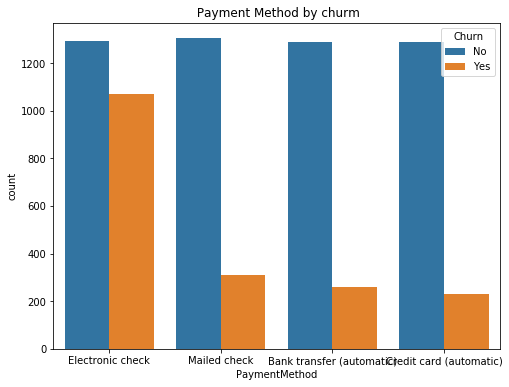

In [7]:
#For jupyter to visualize data %matplotlib inline
%matplotlib inline 
# Recall seaborn library
#import seabor as sns
fig, ax=plt.subplots(figsize=(8,6)) # size figure
sns.countplot(x='PaymentMethod', data=data, hue="Churn") 
plt.title(" Payment Method by churm")

In [ ]:
data.Churn.replace("Yes",1,inplace=True)
data.Churn.replace("No",0,inplace=True)
data

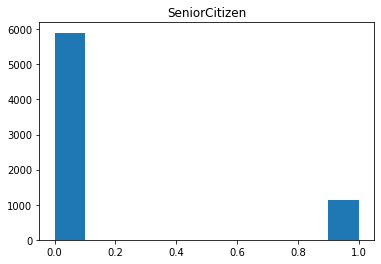

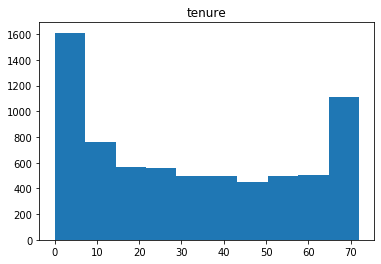

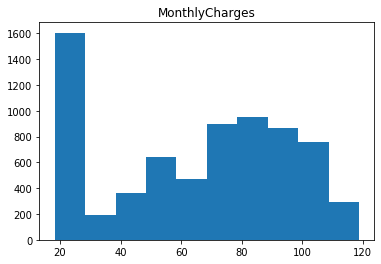

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


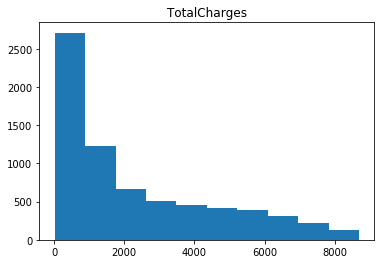

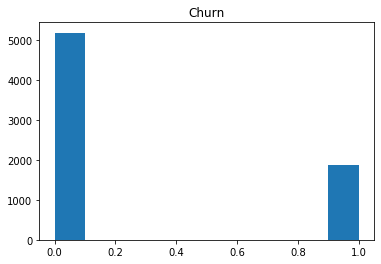

In [19]:
num=data[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges',"Churn"]]
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.show()

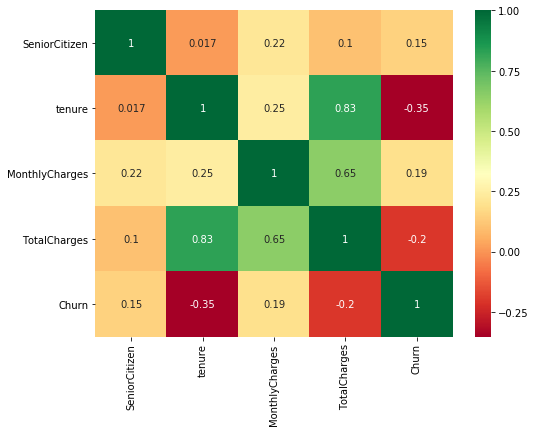

In [20]:
import seaborn as sns
#get correlations of each features in dataset
corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Text(0.5, 1.0, ' Contract by churm')

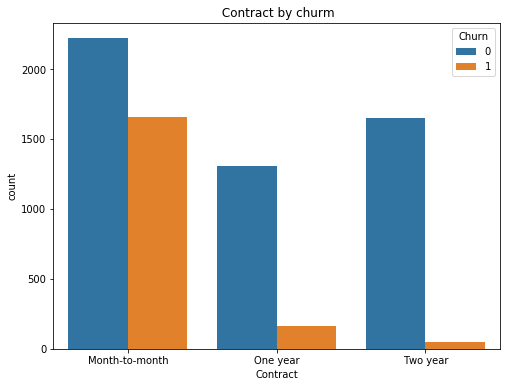

In [22]:
#For jupyter to visualize data %matplotlib inline
%matplotlib inline 
# Recall seaborn library
#import seabor as sns
fig, ax=plt.subplots(figsize=(8,6)) # size figure
sns.countplot(x='Contract', data=data, hue="Churn") 
plt.title(" Contract by churm")

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


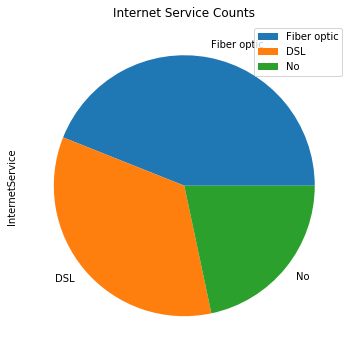

In [32]:
#sns.# Create a data frame of InternetService counts 
gradable_counts = data['InternetService'].value_counts()
print(gradable_counts)

# Plot a pie chart

gradable_counts.plot(kind='pie', title='Internet Service Counts', figsize=(8,6)) 

plt.legend()
plt.show()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


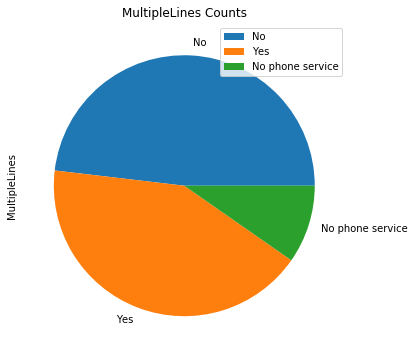

In [33]:

#sns.# Create a data frame of MultipleLines counts 
gradable_counts = data['MultipleLines'].value_counts()
print(gradable_counts)

# Plot a pie chart

gradable_counts.plot(kind='pie', title='MultipleLines Counts', figsize=(8,6)) 

plt.legend()
plt.show()

# Feature Enginering

In [7]:
cat=data[['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]
num=data[['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges',"Churn"]]

In [8]:
dummies = pd.get_dummies(cat)

In [9]:
mix=pd.concat([num,dummies], axis="columns")

In [37]:
x=mix.drop("Churn", axis="columns")
y=data["Churn"]
x.fillna(x.mean(),inplace=True)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [15]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[2.72067852e-02 1.18777976e-01 1.14317510e-01 1.33897869e-01
 2.05232866e-02 2.02784140e-02 1.78273219e-02 1.86194022e-02
 1.36016354e-02 1.35540732e-02 3.19718533e-03 3.79022777e-03
 1.59675614e-02 3.17839801e-03 1.48557092e-02 1.20415123e-02
 2.25050992e-02 5.81281763e-05 3.23987025e-02 9.66692007e-04
 8.99569592e-03 1.96089489e-02 3.49113529e-04 1.20374665e-02
 1.73149161e-02 6.84208085e-04 1.62289800e-02 2.40588386e-02
 6.34382062e-03 1.51337524e-02 1.24008740e-02 2.02510698e-03
 1.30894169e-02 1.17527673e-02 9.84784040e-04 1.41135853e-02
 7.13543886e-02 1.61314871e-02 2.65158139e-02 1.29725380e-02
 1.77157621e-02 1.39553817e-02 1.51009294e-02 3.08587270e-02
 1.27092075e-02]


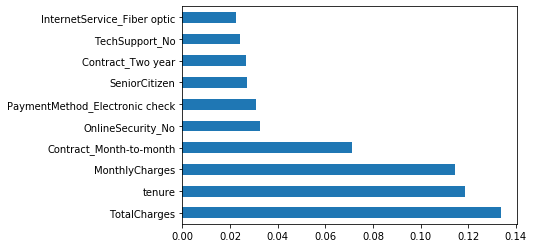

In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Build model use Logistic Regression

In [19]:
x1=x[["TotalCharges","tenure","MonthlyCharges","Contract_Month-to-month", "Contract_Two year","PaymentMethod_Electronic check" ,"OnlineSecurity_No","TechSupport_No" ,"InternetService_Fiber optic","InternetService_No"]]
y=data["Churn"]
x_train, x_test, y_train, y_test = train_test_split(x1,y, test_size=0.25, random_state=42)

In [41]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=10)),
                     ('lr_classifier',LogisticRegression())])

pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=10)),
                     ('dt_classifier',DecisionTreeClassifier())])

pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=10)),
                     ('rf_classifier',RandomForestClassifier())])

pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=10)),
                     ('knn_classifier',KNeighborsClassifier())])


pipeline_svm=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=10)),
                     ('svm_classifier',SVC())])

In [42]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_knn,pipeline_svm]

In [43]:
best_accuracy=0.0
best_Regression=0
best_pipeline=""
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:"KNeighbors",4:'SVM'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.8029528676888131
Decision Tree Test Accuracy: 0.7166382737081204
RandomForest Test Accuracy: 0.7637705848949461
KNeighbors Test Accuracy: 0.7739920499716071
SVM Test Accuracy: 0.7984099943214082


In [45]:
for i,model in enumerate(pipelines):
     if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_Classifier=i
print('Regression with best accuracy:{}'.format(pipe_dict[best_Classifier]))

Regression with best accuracy:Logistic Regression


In [25]:
from sklearn.linear_model import LogisticRegression
lr_clf=pipeline_lr
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
print("Accuracy for Logistic Regression on  data: ",accuracy_score(y_test,pred))
# 0.8029528676888131

Accuracy for Logistic Regression on  data:  0.8029528676888131


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Model Evaluation Metrics

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
print ("confusion_matrix:",confusion_matrix(y_test,pred))
print("precision:",precision_score(y_test,pred))
print("recall:",recall_score(y_test,pred))
print("f1_score :",f1_score(y_test,pred))

confusion_matrix: [[1151  131]
 [ 216  263]]
precision: 0.6675126903553299
recall: 0.5490605427974948
f1_score : 0.6025200458190149


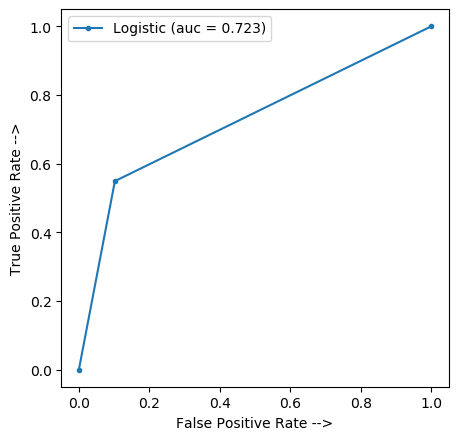

In [27]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test,pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)



plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()